In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical


# 1. Implement a CNN using Keras and Python/R classes with six layers to classify the Fashion MNIST dataset.

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape to match CNN input
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode for the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Layer 1
    MaxPooling2D(pool_size=(2, 2)),                                              # Layer 2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                           # Layer 3
    MaxPooling2D(pool_size=(2, 2)),                                              # Layer 4
    Flatten(),                                                                   # Layer 5
    Dense(128, activation='relu'),                                               # Layer 6
    Dropout(0.3),                                                                # Optional regularization
    Dense(10, activation='softmax')                                              # Output Layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.7095 - loss: 0.7978 - val_accuracy: 0.8638 - val_loss: 0.3724
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.8562 - loss: 0.3940 - val_accuracy: 0.8785 - val_loss: 0.3249
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8795 - loss: 0.3272 - val_accuracy: 0.8902 - val_loss: 0.2905
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.8926 - loss: 0.2926 - val_accuracy: 0.8913 - val_loss: 0.2800
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9003 - loss: 0.2691 - val_accuracy: 0.8953 - val_loss: 0.2787


# 2. Predict Two Images from the Test Set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


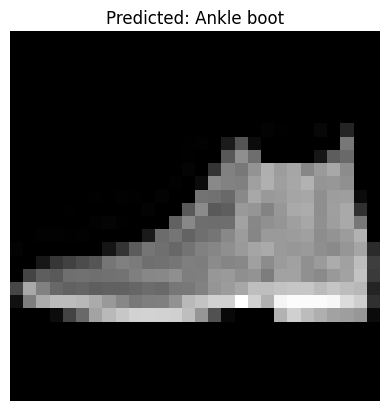

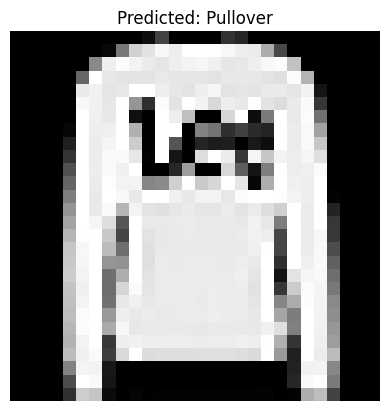

In [7]:
# Select two test images
sample_images = x_test[:2]
sample_labels = y_test[:2]


predictions = model.predict(sample_images)

# Displaying predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(2):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
